In [1]:
import numpy as np

In [2]:
import scipy
from scipy.io import loadmat
from data_generator import DataGenerator

In [3]:
from likelihood import GaussianLogLikelihood
from prior import ComplexityLogPrior
from posterior import LogPosterior
from mcmc import MCMC
from sequential_mc import SequentialMC
from util import generate_binary_coef
import pandas as pd

In [4]:
import matplotlib.pyplot as plt

In [5]:
data = loadmat('../data/phase_field_oneD_simulation_beginning_stage.mat')

In [6]:
# calculate derivatives and prepare data
u = data['usol']
t = np.squeeze(data['t'])
x = np.squeeze(data['x'])
from numerical_derivative import ChebyshevLocalFit_1D
width = 5                
du_x, du_xx, du_t = ChebyshevLocalFit_1D(u, x, t, deg=3, width=width, diff=2)
u = u[width:(-width), width:(-width)]

n_samples = 5000

u = u.flatten()
du_x = du_x.flatten()
du_xx = du_xx.flatten()
du_t = du_t.flatten()

data = np.vstack([u,du_x,du_xx, du_t]).T

np.random.seed(1001)

np.random.shuffle(data)
data = data[:n_samples]

np.save('raw_data', data)

KeyboardInterrupt: 

In [5]:
data = np.load('raw_data.npy')

In [6]:
dg = DataGenerator()

In [7]:
data[:,:-1].shape

(5000, 3)

In [8]:
X, names = dg(data[:,:-1], descriptions=['u','u_x','u_xx'] )

In [9]:
X.shape

(5000, 19)

In [10]:
Y = data[:,-1]

In [11]:
prior = ComplexityLogPrior(method='num_terms', simplicity_preference=1.)

In [12]:
likelihood = GaussianLogLikelihood(X,Y)

In [13]:
posterior = LogPosterior(prior, likelihood)

In [14]:
import itertools

In [15]:
init_coefs = generate_binary_coef(1, len(names))

In [16]:
sequentialmc = SequentialMC(posterior=posterior,log_file='mc.csv')

In [17]:
names

[u,
 u_x,
 u_xx,
 u**2,
 u*u_x,
 u*u_xx,
 u_x**2,
 u_x*u_xx,
 u_xx**2,
 u**3,
 u**2*u_x,
 u**2*u_xx,
 u*u_x**2,
 u*u_x*u_xx,
 u*u_xx**2,
 u_x**3,
 u_x**2*u_xx,
 u_x*u_xx**2,
 u_xx**3]

In [18]:
#init_coefs[0] = np.array([1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0])

In [ ]:
pareto_set = sequentialmc(samples=init_coefs,beta0_nsteps=100,beta0to1_nsteps=100,beta1_nsteps=100, mcmc_nsteps=10,feature_descriptions=names )

step: 0, beta:  0.000
step: 1, beta:  0.000
step: 2, beta:  0.000
step: 3, beta:  0.000


In [ ]:
array = pareto_set.to_array()

In [ ]:
array

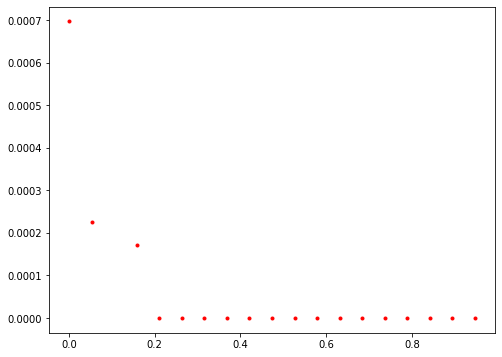

In [30]:
pareto_set.plot()

In [21]:
samples

ParetoSet([], key=<function ParetoSet.__init__.<locals>.<lambda> at 0x7f17a2a56290>)

In [22]:
data = pd.read_csv('mc.csv', header=0)

In [38]:
a=np.array([3])

In [39]:
a[:-1]

array([], dtype=int64)

In [23]:
data

,step,sample 0,sample 1,sample 2,sample 3,sample 4,sample 5,sample 6,sample 7,sample 8,...,sample 10,sample 11,sample 12,sample 13,sample 14,sample 15,sample 16,sample 17,sample 18,sample 19
0,0,-1.00537965213825*u**3 + 1.90786200584944*u**2...,0.0256409290831834*u - 0.0189620587969618,0.0083903660459691 - 3.9826135766061*u_x,8.59273690807373e-5 - 19.8992243645254*u_xx,0.0310490535813891*u**2 - 0.0221187261424073,-5.42192889102722*u*u_x + 0.00565546324669181,1.75646125885161*u*u_xx + 6.00656823463434e-5,0.00425961540935096 - 124.540124248242*u_x**2,-661.074920378391*u_x*u_xx + 5.75202422869897e-5,...,0.0327783226179635*u**3 - 0.0228756294487691,-5.50654789128108*u**2*u_x + 0.00383585874812367,19.4907350260109*u**2*u_xx + 0.000650383978770292,-211.979461179363*u*u_x**2 + 0.00341586092605491,354.744848288076*u*u_x*u_xx + 0.00014042516086...,-25465.5085045224*u*u_xx**2 + 0.00135803823039383,0.00249159540165444 - 3176.58589972123*u_x**3,-18478.9362363788*u_x**2*u_xx + 3.288174163164...,-753332.094247003*u_x*u_xx**2 + 0.001829867516...,8.80193678520384e-5 - 2884025.08265936*u_xx**3
1,1,-1.00420953786684*u**3 - 0.069735566190924*u**...,0.0945862029304471*u**3 - 60.6399386290718*u**...,-0.99234976113262*u**3 + 2.78035172780362*u**2...,-1.00120637328334*u**3 - 0.733491854699136*u**...,-1.00109201227204*u**3 + 0.0223807004669037*u*...,-1.01980564349505*u**3 - 0.431423721098334*u**...,-1.00249891449457*u**3 + 1.90504208469782*u**2...,-1.00314469837904*u**3 - 0.0523893953646391*u*...,-1.02156602470465*u**3 - 0.499718476728945*u**...,...,-1.02185379236712*u**3 - 0.556482859948088*u**...,-1.0029569202484*u**3 + 1.90458978837764*u**2 ...,-0.959166704628357*u**3 + 7.98977037464269*u**...,-0.994004013310043*u**3 - 14.1224244482928*u**...,-1.01223596298263*u**3 - 0.513142095500386*u**...,-0.997910945314483*u**3 + 1.24676443455419*u**...,59.49157911157*u**2*u_x + 8182.06356375692*u*u...,24.4792792231534*u**2*u_x + 0.744249572098142*...,-1.00140302537428*u**3 + 1.90215953894905*u**2...,-1.01155043048703*u**3 - 0.50364388538958*u**2...
